# Homework 6
### Rolando Santos
### https://github.com/rsantos2032/DSCI401/
### 2023-11-02

In [11]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
plotly.offline.init_notebook_mode(connected=True) #Needed for my local jupyter notebook to display plotly

### Question: Using the data whately 2015 from the macleish package, create an interactive plot using plotly (or ggplotly) displaying time (in days) on the x-axis and temperature on the y-axis with three lines: one for the high temperature of the day, one for the average temperature of the day, and one for the low temperature of the day. A csv version of the file can be found here: https://www.dropbox.com/s/m2nt50qanpijp0m/whately2015.csv?dl=0

In [12]:
whately_2015 = pd.read_csv("whately2015.csv", index_col = 0)
whately_2015.head()

,when,temperature,wind_speed,wind_dir,rel_humidity,pressure,solar_radiation,rainfall
1,2015-01-01 00:00:00,-9.32,1.399,225.4,54.55,985,0.0,0.0
2,2015-01-01 00:10:00,-9.46,1.506,248.2,55.38,985,0.0,0.0
3,2015-01-01 00:20:00,-9.44,1.620,258.3,56.18,985,0.0,0.0
4,2015-01-01 00:30:00,-9.30,1.141,243.8,56.41,985,0.0,0.0
5,2015-01-01 00:40:00,-9.32,1.223,238.4,56.87,984,0.0,0.0


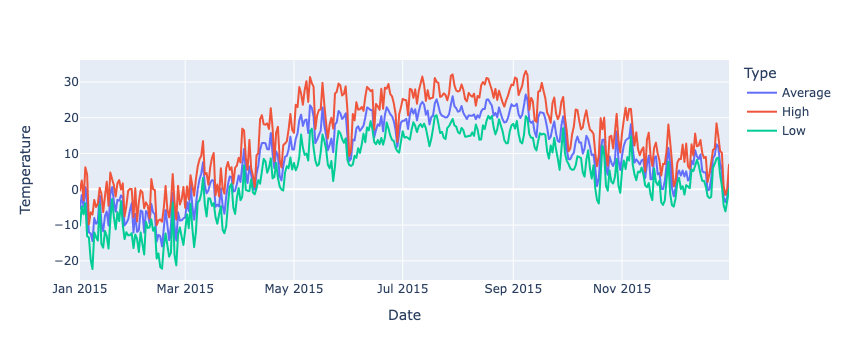

In [20]:
whately_2015_sub = whately_2015
whately_2015_sub["date"] = pd.to_datetime(whately_2015_sub["when"]).dt.strftime('%Y-%m-%d')
whately_2015_sub = whately_2015_sub.groupby("date")["temperature"].agg(
    Average = 'mean', 
    High = 'max', 
    Low = 'min').reset_index()
whately_2015_sub = pd.melt(
    whately_2015_sub, id_vars = "date",
    value_vars = ["Average", "High", "Low"], 
    value_name = "temp", 
    var_name = "type")

pd.options.plotting.backend = "plotly"
px.line(whately_2015_sub, 
        x = "date", 
        y = "temp", 
        color = "type", 
        labels = {
            "date": "Date",
            "temp": "Temperature",
             "type": "Type"
        })